# Assignment1

### 3.1 Pseudonymisation

Imports

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
from anonymizedf.anonymizedf import anonymize

Import the data

In [58]:
df = pd.read_csv(r"athletes.csv")

/var/folders/lt/x1xcmh9n5xz2fgqn5y9_3kf40000gn/T/ipykernel_7442/3087902215.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"athletes.csv")


Remove rows with more than 1 NaN and columns with more than 5

In [59]:
df=df.dropna(thresh=27)
df = df.dropna(axis=1, thresh=len(df) - 5)

Display

In [60]:
display(df)

,athlete_id,name,region,affiliate,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong
102,2720.0,Justin Adams,South Central,Woodward CrossFit,Male,24.0,68.0,315.0,240.0,475.0,405.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|
110,6922.0,Daniel Adamson,South West,CrossFit The Point,Male,31.0,67.0,230.0,175.0,410.0,330.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,2-4 years|
116,12563.0,Steven Lee Adams,Mid Atlantic,CrossFit Kaiju,Male,37.0,72.0,285.0,205.0,525.0,425.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit with a coach (e.g. at an affi...,4+ years|
238,24943.0,Greg Adler,Mid Atlantic,CrossFit Fairfax,Male,44.0,73.0,190.0,155.0,405.0,255.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,4+ years|
304,3066.0,Luke Ahlfield,North Central,CrossFit Homer Glen,Male,31.0,72.0,305.0,255.0,455.0,386.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,2-4 years|
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375133,103943.0,Robert Payton,South East,CrossFit Ambush,Male,56.0,66.0,195.0,135.0,295.0,0.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,1-2 years|
380392,4932.0,Troy Straith,Canada West,CrossFit BC,Male,54.0,76.0,215.0,165.0,345.0,265.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,4+ years|
382760,110296.0,Dennis Walczyk,South West,CrossFit Colorado Springs,Male,36.0,72.0,255.0,200.0,440.0,360.0,"I workout mostly at home, work, or a tradition...",I began CrossFit by trying it alone (without a...,2-4 years|
396717,6878.0,Jessica McCain,North Central,CrossFit Vise,Female,26.0,68.0,170.0,120.0,355.0,245.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|


In [61]:
df.apply(pd.Series.nunique)

athlete_id    2462
name          2455
region          17
affiliate     1611
gender           2
age             41
height          32
candj          186
snatch         172
deadlift       209
backsq         210
train           61
experience      57
howlong         17
dtype: int64

Text(0.5, 1.0, 'Cardinality')

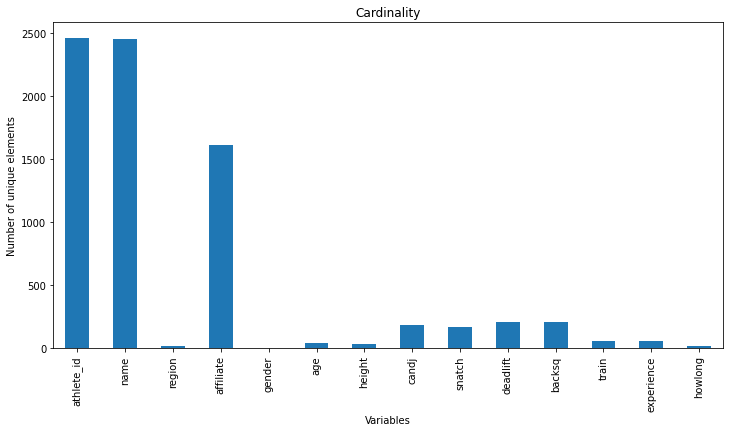

In [62]:
df.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique elements')
plt.xlabel('Variables')
plt.title('Cardinality')

### explicit personally identifiable information
are name and athlete_id attributes have the highest number of unique values so high cardinality <br> 
These values enable a one-to-one mapping to an individual

 Prepare the data to be anonymized

In [63]:
an = anonymize(df)

display name column and corresponding fake name column

In [64]:
an.fake_names("name")
df[['name', 'Fake_name']]

,name,Fake_name
102,Justin Adams,Douglas Knowles
110,Daniel Adamson,Dr Steven Murphy
116,Steven Lee Adams,Miss Susan Carter
238,Greg Adler,Jack Bird
304,Luke Ahlfield,Tracy Lord
...,...,...
375133,Robert Payton,Mr Robert Read
380392,Troy Straith,Ann Finch-Brennan
382760,Dennis Walczyk,Dr Frank Watts
396717,Jessica McCain,Dr Garry Hawkins


display name athlete_id and corresponding fake id column

In [65]:
df['athlete_id'] = df['athlete_id'].astype('string').str.split('.').str[0]
an.fake_ids("athlete_id")
df[['athlete_id', 'Fake_athlete_id']]

,athlete_id,Fake_athlete_id
102,2720,PQUR12801627516520
110,6922,OXGX43392101105601
116,12563,QKON21221545292564
238,24943,NEFY13189253050921
304,3066,RFNB90983331460809
...,...,...
375133,103943,NOUE87267255294004
380392,4932,ZPXD57235681877000
382760,110296,BMPA49978240872025
396717,6878,ZZUX94597020960138


### 3.2 Randomisation

In [66]:
from faker import Faker
import random
import string
from difflib import SequenceMatcher

3.2.1 Generate 2462 random strings each having the length of the original name string

In [67]:
num_strings = 2462

random_strings = list()

index=0

while len(random_strings)<2462:
    string_len=len(df['name'].iloc[index])
    random_string = ''.join(random.choice(string.ascii_letters) for _ in range(string_len))

    if(random_string not in random_strings):
        random_strings.append(random_string)
        index=index+1

In [68]:
random_strings[:8]

['fXYENPvIpwsf',
 'JzJyrzwTnJaCiq',
 'CJSiiJsJxrNctVWj',
 'xmvgecljLx',
 'RAJOAqVwgBPSD',
 'CrkrFiWBuTpu',
 'ArtJbPuBlIeuDs',
 'gdBifFUbzttrEbOlwC']

3.2.2 Generate 2462(size of data set) fake meaningful unique names

In [69]:
fake = Faker()

meaningful_fake_names = set()
while len(meaningful_fake_names) < 2462:
    meaningful_fake_names.add(fake.name())
list(meaningful_fake_names)[:8]

['David Murphy',
 'Robert Townsend',
 'Valerie Williams',
 'Lisa Meyer',
 'Patricia Miller',
 'Billy Smith',
 'Drew Lowe',
 'Andrea Wiley']

replace random_strings from 3.2.1 with meaningful names from 3.2.2 according to similarity between random string and meaningful names

In [70]:
def max_similarity(random_string, full_names, names):
    max_similarity = 0.0
    full_name = ''

    for i in range(len(full_names)):
        similarity = SequenceMatcher(None, random_string, full_names[i]).ratio()

        if similarity > max_similarity and full_names[i] not in names:
            max_similarity = similarity
            full_name = full_names[i]

    return full_name;

final fake meaningful names

In [71]:
final_fake_names = list()
for i in range(len(random_strings)):
    final_fake_names.append(max_similarity(random_strings[i],list(meaningful_fake_names),final_fake_names))

In [72]:
final_fake_names[:8]

['Nicole Phillips',
 'Cory Brown',
 'Jon Smith',
 'George Schultz',
 'Dr. Joshua Vaughn PhD',
 'Carrie Wong',
 'Anthony Robles',
 'Brittany Bryant']

generate lookup table

In [73]:
lookup = pd.DataFrame({"original_name": df['name'], 
                    "random_name": list(final_fake_names)}) 

lookup_table=dict(zip(lookup['random_name'], lookup['original_name']))

#get first 8 elements
list(lookup_table.items())[:8]

[('Nicole Phillips', 'Justin Adams'),
 ('Cory Brown', 'Daniel Adamson'),
 ('Jon Smith', 'Steven Lee Adams'),
 ('George Schultz', 'Greg Adler'),
 ('Dr. Joshua Vaughn PhD', 'Luke Ahlfield'),
 ('Carrie Wong', 'Manny Alayon'),
 ('Anthony Robles', 'Scott Albright'),
 ('Brittany Bryant', 'Fernando Alcantara')]

replace real names with random ones

In [74]:
df['name']=lookup['random_name']
display(df)

,athlete_id,name,region,affiliate,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
102,2720,Nicole Phillips,South Central,Woodward CrossFit,Male,24.0,68.0,315.0,240.0,475.0,405.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Douglas Knowles,PQUR12801627516520
110,6922,Cory Brown,South West,CrossFit The Point,Male,31.0,67.0,230.0,175.0,410.0,330.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,2-4 years|,Dr Steven Murphy,OXGX43392101105601
116,12563,Jon Smith,Mid Atlantic,CrossFit Kaiju,Male,37.0,72.0,285.0,205.0,525.0,425.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Miss Susan Carter,QKON21221545292564
238,24943,George Schultz,Mid Atlantic,CrossFit Fairfax,Male,44.0,73.0,190.0,155.0,405.0,255.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Jack Bird,NEFY13189253050921
304,3066,Dr. Joshua Vaughn PhD,North Central,CrossFit Homer Glen,Male,31.0,72.0,305.0,255.0,455.0,386.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,2-4 years|,Tracy Lord,RFNB90983331460809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375133,103943,Melissa Guerrero,South East,CrossFit Ambush,Male,56.0,66.0,195.0,135.0,295.0,0.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,1-2 years|,Mr Robert Read,NOUE87267255294004
380392,4932,Michele Patterson,Canada West,CrossFit BC,Male,54.0,76.0,215.0,165.0,345.0,265.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Ann Finch-Brennan,ZPXD57235681877000
382760,110296,Christine Johnston,South West,CrossFit Colorado Springs,Male,36.0,72.0,255.0,200.0,440.0,360.0,"I workout mostly at home, work, or a tradition...",I began CrossFit by trying it alone (without a...,2-4 years|,Dr Frank Watts,BMPA49978240872025
396717,6878,Christine Johnson,North Central,CrossFit Vise,Female,26.0,68.0,170.0,120.0,355.0,245.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Dr Garry Hawkins,ZZUX94597020960138


try getting the original name from lookup table

In [75]:
lookup_table.get(df['name'].iloc[0])

'Justin Adams'

### 3.3 Aggregation 

In [76]:
import math
def categorize_values(column_name,column, num_bins):
    bins, bin_edges = pd.qcut(column, q=num_bins, retbins=True, labels=False, duplicates='drop')


    labels = [str(bin_edges[i])+'-'+str(bin_edges[i+1]) for i in range(len(bin_edges)-1)]

    print('before')
    print(df[column_name])
    df[column_name] = pd.cut(column, bins=bin_edges, labels=labels)
    print('after')
    print(df[column_name])

minimum age present is 14 and maximum 56

In [77]:
categorize_values('age',df['age'],5)

before
102       24.0
110       31.0
116       37.0
238       44.0
304       31.0
          ... 
375133    56.0
380392    54.0
382760    36.0
396717    26.0
421423    36.0
Name: age, Length: 2462, dtype: float64
after
102       14.0-28.0
110       28.0-31.0
116       34.0-40.0
238       40.0-56.0
304       28.0-31.0
            ...    
375133    40.0-56.0
380392    40.0-56.0
382760    34.0-40.0
396717    14.0-28.0
421423    34.0-40.0
Name: age, Length: 2462, dtype: category
Categories (5, object): ['14.0-28.0' < '28.0-31.0' < '31.0-34.0' < '34.0-40.0' < '40.0-56.0']


To use height we need first to remove outliers since height has outliers

In [78]:
categorize_values("height",df["height"], 5)

before
102       68.0
110       67.0
116       72.0
238       73.0
304       72.0
          ... 
375133    66.0
380392    76.0
382760    72.0
396717    68.0
421423    60.0
Name: height, Length: 2462, dtype: float64
after
102            66.0-69.0
110            66.0-69.0
116            70.0-72.0
238       72.0-8388607.0
304            70.0-72.0
               ...      
375133          1.0-66.0
380392    72.0-8388607.0
382760         70.0-72.0
396717         66.0-69.0
421423          1.0-66.0
Name: height, Length: 2462, dtype: category
Categories (5, object): ['1.0-66.0' < '66.0-69.0' < '69.0-70.0' < '70.0-72.0' < '72.0-8388607.0']


In [79]:
categorize_values('candj',df['candj'],5)

before
102       315.0
110       230.0
116       285.0
238       190.0
304       305.0
          ...  
375133    195.0
380392    215.0
382760    255.0
396717    170.0
421423    105.0
Name: candj, Length: 2462, dtype: float64
after
102                   275.0-1936.0
110       209.60000000000002-240.0
116                   275.0-1936.0
238       175.0-209.60000000000002
304                   275.0-1936.0
                    ...           
375133    175.0-209.60000000000002
380392    209.60000000000002-240.0
382760                 240.0-275.0
396717                 -45.0-175.0
421423                 -45.0-175.0
Name: candj, Length: 2462, dtype: category
Categories (5, object): ['-45.0-175.0' < '175.0-209.60000000000002' < '209.60000000000002-240.0' < '240.0-275.0' < '275.0-1936.0']


In [80]:
categorize_values('deadlift',df['deadlift'],5)
categorize_values('backsq',df['backsq'],5)

before
102       475.0
110       410.0
116       525.0
238       405.0
304       455.0
          ...  
375133    295.0
380392    345.0
382760    440.0
396717    355.0
421423    235.0
Name: deadlift, Length: 2462, dtype: float64
after
102       465.0-1936.0
110        375.0-419.0
116       465.0-1936.0
238        375.0-419.0
304        419.0-465.0
              ...     
375133       0.0-305.0
380392     305.0-375.0
382760     419.0-465.0
396717     305.0-375.0
421423       0.0-305.0
Name: deadlift, Length: 2462, dtype: category
Categories (5, object): ['0.0-305.0' < '305.0-375.0' < '375.0-419.0' < '419.0-465.0' < '465.0-1936.0']
before
102       405.0
110       330.0
116       425.0
238       255.0
304       386.0
          ...  
375133      0.0
380392    265.0
382760    360.0
396717    245.0
421423    145.0
Name: backsq, Length: 2462, dtype: float64
after
102       385.0-3450.0
110        295.0-340.0
116       385.0-3450.0
238        240.0-295.0
304       385.0-3450.0
              ...

works with all numerical columns. Will not do the snatch because it will be used in the next exercise. Could also work with id but will not do it

3.4 Perturbation

In [81]:
import numpy as np

Add Gaussian noise to snatch attribute

In [82]:
def gaussian_noise(df,std_dev):   
   df_with_noise = df.copy()
   noise = np.random.normal(0, std_dev, len(df_with_noise))
   df_with_noise["snatch"] += noise
   display(df_with_noise)
   return df_with_noise

analyze the difference in the distribution

In [83]:
def compare_distributions(df_with_noise):
    print(df['snatch'].describe())
    print("---------With noise ----------")
    print(df_with_noise['snatch'].describe())

    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.hist(df['snatch'], bins=100, color='pink', alpha=0.7)
    plt.title('Original snatch Distribution')

    plt.subplot(1, 2, 2)
    plt.hist(df_with_noise['snatch'], bins=100, color='purple', alpha=0.7)
    plt.title('snatch Distribution with Noise')

    plt.tight_layout()
    plt.show()

The standard deviation is used to determine the amount of noise added. It can be adjusted desired level of noise.

,athlete_id,name,region,affiliate,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
102,2720,Nicole Phillips,South Central,Woodward CrossFit,Male,14.0-28.0,66.0-69.0,275.0-1936.0,195.382583,465.0-1936.0,385.0-3450.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Douglas Knowles,PQUR12801627516520
110,6922,Cory Brown,South West,CrossFit The Point,Male,28.0-31.0,66.0-69.0,209.60000000000002-240.0,226.095412,375.0-419.0,295.0-340.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,2-4 years|,Dr Steven Murphy,OXGX43392101105601
116,12563,Jon Smith,Mid Atlantic,CrossFit Kaiju,Male,34.0-40.0,70.0-72.0,275.0-1936.0,276.817082,465.0-1936.0,385.0-3450.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Miss Susan Carter,QKON21221545292564
238,24943,George Schultz,Mid Atlantic,CrossFit Fairfax,Male,40.0-56.0,72.0-8388607.0,175.0-209.60000000000002,155.202236,375.0-419.0,240.0-295.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Jack Bird,NEFY13189253050921
304,3066,Dr. Joshua Vaughn PhD,North Central,CrossFit Homer Glen,Male,28.0-31.0,70.0-72.0,275.0-1936.0,303.175509,419.0-465.0,385.0-3450.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,2-4 years|,Tracy Lord,RFNB90983331460809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375133,103943,Melissa Guerrero,South East,CrossFit Ambush,Male,40.0-56.0,1.0-66.0,175.0-209.60000000000002,202.606956,0.0-305.0,NaN,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,1-2 years|,Mr Robert Read,NOUE87267255294004
380392,4932,Michele Patterson,Canada West,CrossFit BC,Male,40.0-56.0,72.0-8388607.0,209.60000000000002-240.0,197.895626,305.0-375.0,240.0-295.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Ann Finch-Brennan,ZPXD57235681877000
382760,110296,Christine Johnston,South West,CrossFit Colorado Springs,Male,34.0-40.0,70.0-72.0,240.0-275.0,294.315084,419.0-465.0,340.0-385.0,"I workout mostly at home, work, or a tradition...",I began CrossFit by trying it alone (without a...,2-4 years|,Dr Frank Watts,BMPA49978240872025
396717,6878,Christine Johnson,North Central,CrossFit Vise,Female,14.0-28.0,66.0-69.0,-45.0-175.0,83.928021,305.0-375.0,240.0-295.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Dr Garry Hawkins,ZZUX94597020960138


count    2457.000000
mean      172.084656
std        64.158384
min         0.000000
25%       136.000000
50%       165.000000
75%       205.000000
max      1936.000000
Name: snatch, dtype: float64
---------With noise ----------
count    2457.000000
mean      169.868732
std        90.512515
min      -123.465045
25%       114.790187
50%       169.650902
75%       223.042524
max      1969.340347
Name: snatch, dtype: float64


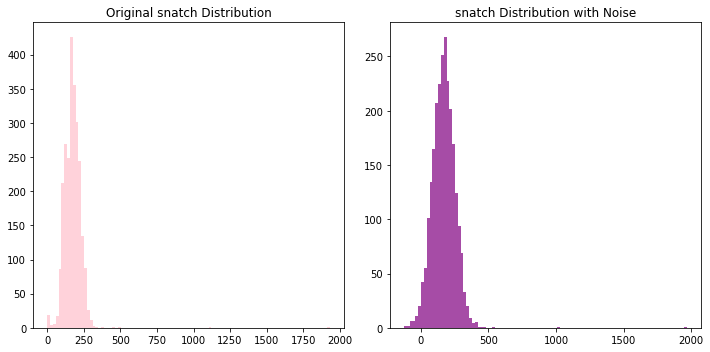

In [84]:
df_with_noise=gaussian_noise(df,df["snatch"].std())
compare_distributions(df_with_noise)

,athlete_id,name,region,affiliate,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
102,2720,Nicole Phillips,South Central,Woodward CrossFit,Male,14.0-28.0,66.0-69.0,275.0-1936.0,239.997505,465.0-1936.0,385.0-3450.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Douglas Knowles,PQUR12801627516520
110,6922,Cory Brown,South West,CrossFit The Point,Male,28.0-31.0,66.0-69.0,209.60000000000002-240.0,175.004298,375.0-419.0,295.0-340.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,2-4 years|,Dr Steven Murphy,OXGX43392101105601
116,12563,Jon Smith,Mid Atlantic,CrossFit Kaiju,Male,34.0-40.0,70.0-72.0,275.0-1936.0,205.002055,465.0-1936.0,385.0-3450.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Miss Susan Carter,QKON21221545292564
238,24943,George Schultz,Mid Atlantic,CrossFit Fairfax,Male,40.0-56.0,72.0-8388607.0,175.0-209.60000000000002,154.988657,375.0-419.0,240.0-295.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Jack Bird,NEFY13189253050921
304,3066,Dr. Joshua Vaughn PhD,North Central,CrossFit Homer Glen,Male,28.0-31.0,70.0-72.0,275.0-1936.0,255.088796,419.0-465.0,385.0-3450.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,2-4 years|,Tracy Lord,RFNB90983331460809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375133,103943,Melissa Guerrero,South East,CrossFit Ambush,Male,40.0-56.0,1.0-66.0,175.0-209.60000000000002,135.116105,0.0-305.0,NaN,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,1-2 years|,Mr Robert Read,NOUE87267255294004
380392,4932,Michele Patterson,Canada West,CrossFit BC,Male,40.0-56.0,72.0-8388607.0,209.60000000000002-240.0,164.931550,305.0-375.0,240.0-295.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Ann Finch-Brennan,ZPXD57235681877000
382760,110296,Christine Johnston,South West,CrossFit Colorado Springs,Male,34.0-40.0,70.0-72.0,240.0-275.0,200.009782,419.0-465.0,340.0-385.0,"I workout mostly at home, work, or a tradition...",I began CrossFit by trying it alone (without a...,2-4 years|,Dr Frank Watts,BMPA49978240872025
396717,6878,Christine Johnson,North Central,CrossFit Vise,Female,14.0-28.0,66.0-69.0,-45.0-175.0,120.025985,305.0-375.0,240.0-295.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Dr Garry Hawkins,ZZUX94597020960138


count    2457.000000
mean      172.084656
std        64.158384
min         0.000000
25%       136.000000
50%       165.000000
75%       205.000000
max      1936.000000
Name: snatch, dtype: float64
---------With noise ----------
count    2457.000000
mean      172.086848
std        64.158841
min        -0.164759
25%       135.741324
50%       165.211539
75%       205.007058
max      1935.986707
Name: snatch, dtype: float64


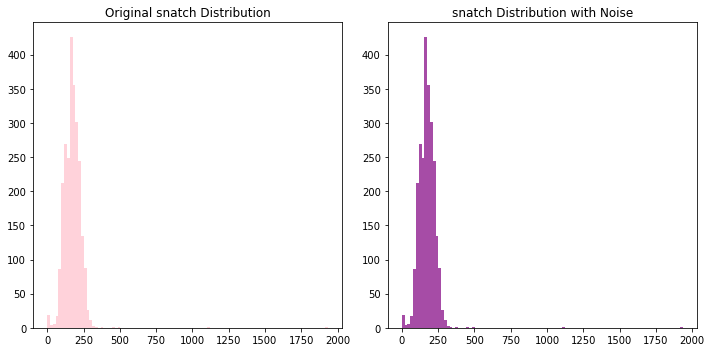

In [85]:
df_with_noise=gaussian_noise(df,0.1)
compare_distributions(df_with_noise)

# 3.5 Data Analysis

mean squared error function

In [86]:
def analyze_information_loss(original_data, noisy_data):
     squared_error = (original_data - noisy_data) ** 2
     return np.sum(squared_error) / original_data.size

Total Variation Distance as a similarity measure

In [87]:
def total_variation_distance(original_data, noisy_data):   
    return 0.5 * np.sum(np.abs(original_data - noisy_data))


Results

In [88]:
df_with_noise=gaussian_noise(df,df["snatch"].std())
print("MSE: "+str(analyze_information_loss(df['snatch'],df_with_noise['snatch'])))
print("total variation distance: "+str(total_variation_distance(df['snatch'],df_with_noise['snatch'])))

,athlete_id,name,region,affiliate,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
102,2720,Nicole Phillips,South Central,Woodward CrossFit,Male,14.0-28.0,66.0-69.0,275.0-1936.0,220.753919,465.0-1936.0,385.0-3450.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Douglas Knowles,PQUR12801627516520
110,6922,Cory Brown,South West,CrossFit The Point,Male,28.0-31.0,66.0-69.0,209.60000000000002-240.0,255.604597,375.0-419.0,295.0-340.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,2-4 years|,Dr Steven Murphy,OXGX43392101105601
116,12563,Jon Smith,Mid Atlantic,CrossFit Kaiju,Male,34.0-40.0,70.0-72.0,275.0-1936.0,165.519907,465.0-1936.0,385.0-3450.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Miss Susan Carter,QKON21221545292564
238,24943,George Schultz,Mid Atlantic,CrossFit Fairfax,Male,40.0-56.0,72.0-8388607.0,175.0-209.60000000000002,115.479775,375.0-419.0,240.0-295.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Jack Bird,NEFY13189253050921
304,3066,Dr. Joshua Vaughn PhD,North Central,CrossFit Homer Glen,Male,28.0-31.0,70.0-72.0,275.0-1936.0,311.116270,419.0-465.0,385.0-3450.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,2-4 years|,Tracy Lord,RFNB90983331460809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375133,103943,Melissa Guerrero,South East,CrossFit Ambush,Male,40.0-56.0,1.0-66.0,175.0-209.60000000000002,208.832267,0.0-305.0,NaN,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,1-2 years|,Mr Robert Read,NOUE87267255294004
380392,4932,Michele Patterson,Canada West,CrossFit BC,Male,40.0-56.0,72.0-8388607.0,209.60000000000002-240.0,67.873619,305.0-375.0,240.0-295.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Ann Finch-Brennan,ZPXD57235681877000
382760,110296,Christine Johnston,South West,CrossFit Colorado Springs,Male,34.0-40.0,70.0-72.0,240.0-275.0,198.784719,419.0-465.0,340.0-385.0,"I workout mostly at home, work, or a tradition...",I began CrossFit by trying it alone (without a...,2-4 years|,Dr Frank Watts,BMPA49978240872025
396717,6878,Christine Johnson,North Central,CrossFit Vise,Female,14.0-28.0,66.0-69.0,-45.0-175.0,96.154071,305.0-375.0,240.0-295.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Dr Garry Hawkins,ZZUX94597020960138


MSE: 4144.680760731802
total variation distance: 62750.10403383993


Results with less std deviation

In [89]:
df_with_noise=gaussian_noise(df,0.1)
print("MSE: "+str(analyze_information_loss(df['snatch'],df_with_noise['snatch'])))
print("total variation distance: "+str(total_variation_distance(df['snatch'],df_with_noise['snatch'])))

,athlete_id,name,region,affiliate,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
102,2720,Nicole Phillips,South Central,Woodward CrossFit,Male,14.0-28.0,66.0-69.0,275.0-1936.0,240.184200,465.0-1936.0,385.0-3450.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Douglas Knowles,PQUR12801627516520
110,6922,Cory Brown,South West,CrossFit The Point,Male,28.0-31.0,66.0-69.0,209.60000000000002-240.0,175.065051,375.0-419.0,295.0-340.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,2-4 years|,Dr Steven Murphy,OXGX43392101105601
116,12563,Jon Smith,Mid Atlantic,CrossFit Kaiju,Male,34.0-40.0,70.0-72.0,275.0-1936.0,204.934519,465.0-1936.0,385.0-3450.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Miss Susan Carter,QKON21221545292564
238,24943,George Schultz,Mid Atlantic,CrossFit Fairfax,Male,40.0-56.0,72.0-8388607.0,175.0-209.60000000000002,155.157376,375.0-419.0,240.0-295.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Jack Bird,NEFY13189253050921
304,3066,Dr. Joshua Vaughn PhD,North Central,CrossFit Homer Glen,Male,28.0-31.0,70.0-72.0,275.0-1936.0,255.023062,419.0-465.0,385.0-3450.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,2-4 years|,Tracy Lord,RFNB90983331460809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
375133,103943,Melissa Guerrero,South East,CrossFit Ambush,Male,40.0-56.0,1.0-66.0,175.0-209.60000000000002,134.828277,0.0-305.0,NaN,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,1-2 years|,Mr Robert Read,NOUE87267255294004
380392,4932,Michele Patterson,Canada West,CrossFit BC,Male,40.0-56.0,72.0-8388607.0,209.60000000000002-240.0,164.975556,305.0-375.0,240.0-295.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Ann Finch-Brennan,ZPXD57235681877000
382760,110296,Christine Johnston,South West,CrossFit Colorado Springs,Male,34.0-40.0,70.0-72.0,240.0-275.0,200.014136,419.0-465.0,340.0-385.0,"I workout mostly at home, work, or a tradition...",I began CrossFit by trying it alone (without a...,2-4 years|,Dr Frank Watts,BMPA49978240872025
396717,6878,Christine Johnson,North Central,CrossFit Vise,Female,14.0-28.0,66.0-69.0,-45.0-175.0,119.869802,305.0-375.0,240.0-295.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Dr Garry Hawkins,ZZUX94597020960138


MSE: 0.010058808474944487
total variation distance: 98.89580724420946
